<a href="https://colab.research.google.com/github/GyeolKim824/Undergraduate_Archive/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# multi linear regression

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

n_epo = 5000
for epoch in range(n_epo+1):

  # hypothesis and loss function
  H = x1_train*w1 + x2_train*w2 + x3_train*w3 + b
  cost = torch.mean((H-y_train)**2)

  # feedback
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, n_epo, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))


Epoch    0/5000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/5000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/5000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/5000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/5000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/5000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/5000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/5000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/5000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/5000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/5000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390
Epoch 1100/5000 w1: 0.722 w2: 0.608 w3: 0.680 b: 0.009 Cost: 1.038574
Epoch 1200/5000 w1: 0.727 w2: 0.603 w3: 0.681 b: 0.010 Cost: 0.999884
Epoch 1300/5000 w1: 0.731 w2: 0.599 w3: 0.681 b: 0.010 Cost: 0.963217
Epoch 1400/5000 

# 새 섹션

Epoch 0/100, Train Loss: 0.2504, Train R2: -0.0202, Val R2: -0.0286
Epoch 10/100, Train Loss: 0.2428, Train R2: -0.0117, Val R2: -0.0205
Epoch 20/100, Train Loss: 0.2506, Train R2: -0.0018, Val R2: -0.0045
Epoch 30/100, Train Loss: 0.2499, Train R2: 0.0000, Val R2: -0.0016
Epoch 40/100, Train Loss: 0.2535, Train R2: -0.0023, Val R2: -0.0080
Epoch 50/100, Train Loss: 0.2632, Train R2: -0.0001, Val R2: -0.0057
Epoch 60/100, Train Loss: 0.2501, Train R2: 0.0003, Val R2: -0.0045
Epoch 70/100, Train Loss: 0.2507, Train R2: -0.0021, Val R2: -0.0024
Epoch 80/100, Train Loss: 0.2465, Train R2: -0.0121, Val R2: -0.0134
Epoch 90/100, Train Loss: 0.2598, Train R2: -0.0017, Val R2: -0.0051


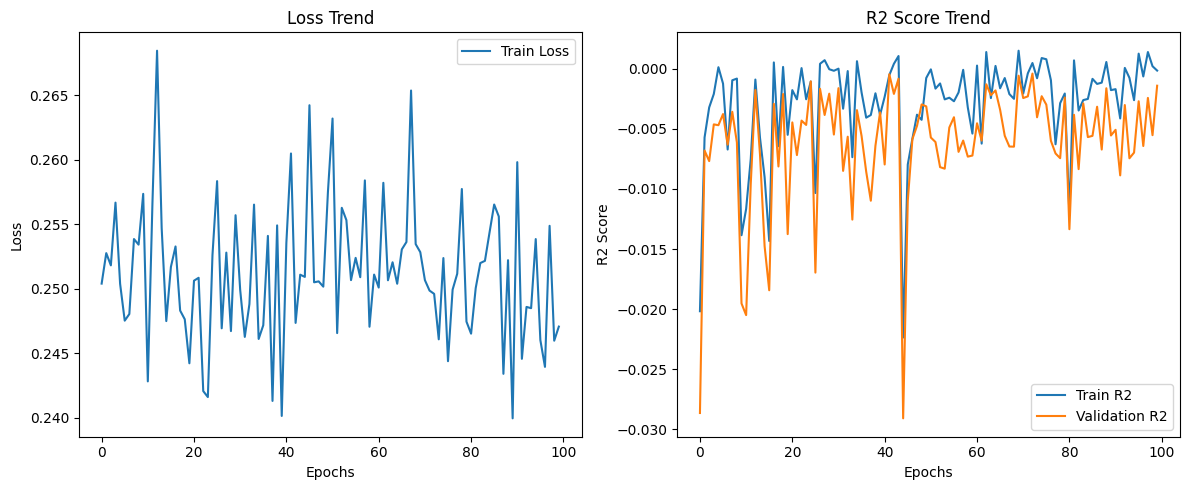

Test MSE: 0.2504, Test R2 Score: -0.0015


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# CSV 파일 로드
received = pd.read_csv("Received_data_set.csv")
transmitted = pd.read_csv("Transmitted_data_set.csv")

# 데이터 전처리
X = received.values.astype('float32')
X = (X - X.mean()) / X.std()  # 입력 데이터 정규화
Y = transmitted.values.astype('float32')  # 이진화하지 않음

# 데이터 분할 (50% 학습, 20% 검증, 30% 테스트)
sample = X.shape[0]
size_t = int(sample * 0.5)
size_v = int(sample * 0.2)

X_t, Y_t = X[:size_t], Y[:size_t]
X_v, Y_v = X[size_t:size_t + size_v], Y[size_t:size_t + size_v]
X_test, Y_test = X[size_t + size_v:], Y[size_t + size_v:]

# PyTorch 텐서 변환
X_t_tensor, Y_t_tensor = torch.FloatTensor(X_t), torch.FloatTensor(Y_t)
X_v_tensor, Y_v_tensor = torch.FloatTensor(X_v), torch.FloatTensor(Y_v)
X_test_tensor, Y_test_tensor = torch.FloatTensor(X_test), torch.FloatTensor(Y_test)

# DataLoader 생성
batch_size = 64
t_loader = DataLoader(TensorDataset(X_t_tensor, Y_t_tensor), batch_size=batch_size, shuffle=True)
v_loader = DataLoader(TensorDataset(X_v_tensor, Y_v_tensor), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test_tensor, Y_test_tensor), batch_size=batch_size, shuffle=False)

# 회귀 모델 정의
class SignalRecoveryRegression(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return x

# 모델 생성
input_size = X_t_tensor.shape[1]
model = SignalRecoveryRegression(input_size)

# 손실 함수 및 옵티마이저
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 평가 함수
def evaluate_model(model, data_loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for X_batch, Y_batch in data_loader:
            outputs = model(X_batch)
            y_true.extend(Y_batch.numpy())
            y_pred.extend(outputs.numpy())

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

# 학습 과정
epochs = 100
t_loss, v_loss = [], []
t_r2, v_r2 = [], []

for epoch in range(epochs):
    model.train()
    for X_batch, Y_batch in t_loader:
        optimizer.zero_grad()
        Y_pred = model(X_batch)
        loss = loss_function(Y_pred, Y_batch)
        loss.backward()
        optimizer.step()

    t_loss.append(loss.item())

    # 평가
    train_mse, train_r2 = evaluate_model(model, t_loader)
    val_mse, val_r2 = evaluate_model(model, v_loader)

    t_r2.append(train_r2)
    v_r2.append(val_r2)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Train Loss: {loss.item():.4f}, Train R2: {train_r2:.4f}, Val R2: {val_r2:.4f}")

# 그래프 출력
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t_loss, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Trend")

plt.subplot(1, 2, 2)
plt.plot(t_r2, label="Train R2")
plt.plot(v_r2, label="Validation R2")
plt.xlabel("Epochs")
plt.ylabel("R2 Score")
plt.legend()
plt.title("R2 Score Trend")

plt.tight_layout()
plt.show()

# 테스트 세트에 대한 최종 평가
test_mse, test_r2 = evaluate_model(model, test_loader)
print(f"Test MSE: {test_mse:.4f}, Test R2 Score: {test_r2:.4f}")





In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from google.colab import files

# 파일 업로드
uploaded = files.upload()

# 데이터 로드
received = pd.read_csv("Received_data_set.csv")
transmitted = pd.read_csv("Transmitted_data_set.csv")

# 컬럼명 지정
received.columns = ["Received_Signal"]
transmitted.columns = ["Transmitted_Signal"]

# 데이터 정규화
X = received["Received_Signal"].values.astype('float32').reshape(-1, 1)
X = (X - X.mean()) / X.std()
Y = transmitted["Transmitted_Signal"].values.astype('float32').reshape(-1, 1)

# 데이터 분할 (50% 학습, 20% 검증, 30% 테스트)
sample = X.shape[0]
size_t = int(sample * 0.5)
size_v = int(sample * 0.2)

X_t, Y_t = X[:size_t], Y[:size_t]
X_v, Y_v = X[size_t:size_t + size_v], Y[size_t:size_t + size_v]
X_test, Y_test = X[size_t + size_v:], Y[size_t + size_v:]

# PyTorch 텐서 변환
X_t_tensor, Y_t_tensor = torch.FloatTensor(X_t), torch.FloatTensor(Y_t)
X_v_tensor, Y_v_tensor = torch.FloatTensor(X_v), torch.FloatTensor(Y_v)
X_test_tensor, Y_test_tensor = torch.FloatTensor(X_test), torch.FloatTensor(Y_test)

# 신경망 모델 정의
class SignalRecoveryNN(nn.Module):
    def __init__(self):
        super(SignalRecoveryNN, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# 모델 초기화
model = SignalRecoveryNN()
criterion = nn.BCELoss()  # 이진 분류를 위한 Binary Cross Entropy Loss 사용
optimizer = optim.Adam(model.parameters(), lr=0.005)

# 학습 과정
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_t_tensor)
    loss = criterion(outputs, Y_t_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# 검증 데이터로 모델 평가
model.eval()
with torch.no_grad():
    val_outputs = model(X_v_tensor)
    val_loss = criterion(val_outputs, Y_v_tensor)
    print(f"Validation Loss: {val_loss.item():.4f}")

# 테스트 데이터로 예측 수행
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs.numpy() > 0.5).astype(int)  # 0.5 기준으로 이진화

# 결과 출력
print("Test Results:")
for i in range(len(test_predictions)):
    print(f"Received: {X_test[i][0]:.5f}, Predicted: {test_predictions[i][0]}, Actual: {Y_test[i][0]}")



Saving Received_data_set.csv to Received_data_set (3).csv
Saving Transmitted_data_set.csv to Transmitted_data_set (3).csv
Epoch [10/200], Loss: 0.6926
Epoch [20/200], Loss: 0.6926
Epoch [30/200], Loss: 0.6925
Epoch [40/200], Loss: 0.6924
Epoch [50/200], Loss: 0.6924
Epoch [60/200], Loss: 0.6924
Epoch [70/200], Loss: 0.6924
Epoch [80/200], Loss: 0.6924
Epoch [90/200], Loss: 0.6924
Epoch [100/200], Loss: 0.6923
Epoch [110/200], Loss: 0.6923
Epoch [120/200], Loss: 0.6923
Epoch [130/200], Loss: 0.6923
Epoch [140/200], Loss: 0.6922
Epoch [150/200], Loss: 0.6922
Epoch [160/200], Loss: 0.6922
Epoch [170/200], Loss: 0.6922
Epoch [180/200], Loss: 0.6921
Epoch [190/200], Loss: 0.6921
Epoch [200/200], Loss: 0.6920
Validation Loss: 0.6939
Test Results:
Received: -1.73884, Predicted: 1, Actual: 1.0
Received: -1.02764, Predicted: 1, Actual: 1.0
Received: -0.96417, Predicted: 1, Actual: 0.0
Received: 0.40360, Predicted: 1, Actual: 1.0
Received: 0.24257, Predicted: 1, Actual: 0.0
Received: 1.44073, Pr

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from google.colab import files
from torch.utils.data import DataLoader, TensorDataset


# 데이터 로드
received = pd.read_csv("Received_data_set.csv")
transmitted = pd.read_csv("Transmitted_data_set.csv")

# 컬럼명 지정
received.columns = ["Received_Signal"]
transmitted.columns = ["Transmitted_Signal"]

# 데이터 정규화
X = received["Received_Signal"].values.astype('float32').reshape(-1, 1)
X = (X - X.mean()) / X.std()
Y = transmitted["Transmitted_Signal"].values.astype('float32').reshape(-1, 1)

# 데이터 분할 (50% 학습, 20% 검증, 30% 테스트)
sample = X.shape[0]
size_t = int(sample * 0.5)
size_v = int(sample * 0.2)

X_t, Y_t = X[:size_t], Y[:size_t]
X_v, Y_v = X[size_t:size_t + size_v], Y[size_t:size_t + size_v]
X_test, Y_test = X[size_t + size_v:], Y[size_t + size_v:]

# PyTorch 텐서 변환
X_t_tensor, Y_t_tensor = torch.FloatTensor(X_t), torch.FloatTensor(Y_t)
X_v_tensor, Y_v_tensor = torch.FloatTensor(X_v), torch.FloatTensor(Y_v)
X_test_tensor, Y_test_tensor = torch.FloatTensor(X_test), torch.FloatTensor(Y_test)

# 배치 학습을 위한 DataLoader 설정
batch_size = 32
train_dataset = TensorDataset(X_t_tensor, Y_t_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 신경망 모델 정의
class SignalRecoveryNN(nn.Module):
    def __init__(self):
        super(SignalRecoveryNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.3)  # 드롭아웃 추가

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)  # BCEWithLogitsLoss 사용 시 Sigmoid 제거
        return x

# 모델 초기화
model = SignalRecoveryNN()
criterion = nn.BCEWithLogitsLoss()  # Sigmoid 제거된 출력값을 위한 BCEWithLogitsLoss 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 과정
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}")

# 검증 데이터로 모델 평가
model.eval()
with torch.no_grad():
    val_outputs = model(X_v_tensor)
    val_loss = criterion(val_outputs, Y_v_tensor)
    print(f"Validation Loss: {val_loss.item():.4f}")

# 테스트 데이터로 예측 수행
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = (torch.sigmoid(test_outputs).numpy() > 0.5).astype(int)  # 0.5 기준으로 이진화

# 결과 출력
print("Test Results:")
for i in range(len(test_predictions)):
    print(f"Received: {X_test[i][0]:.5f}, Predicted: {test_predictions[i][0]}, Actual: {Y_test[i][0]}")


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from google.colab import files
from torch.utils.data import DataLoader, TensorDataset

# 파일 업로드
uploaded = files.upload()

# 데이터 로드
received = pd.read_csv("Received_data_set.csv")
transmitted = pd.read_csv("Transmitted_data_set.csv")

# 컬럼명 지정
received.columns = ["Received_Signal"]
transmitted.columns = ["Transmitted_Signal"]

# 데이터 정규화 (표준편차가 너무 작아 NaN 방지)
X = received["Received_Signal"].values.astype('float32').reshape(-1, 1)
X_std = np.clip(X.std(), 1e-6, None)  # 너무 작은 값 방지
X = (X - X.mean()) / X_std
Y = transmitted["Transmitted_Signal"].values.astype('float32').reshape(-1, 1)

# 데이터 분할 (50% 학습, 20% 검증, 30% 테스트)
sample = X.shape[0]
size_t = int(sample * 0.5)
size_v = int(sample * 0.2)

X_t, Y_t = X[:size_t], Y[:size_t]
X_v, Y_v = X[size_t:size_t + size_v], Y[size_t:size_t + size_v]
X_test, Y_test = X[size_t + size_v:], Y[size_t + size_v:]

# PyTorch CPU 설정
device = torch.device("cpu")

# PyTorch 텐서 변환 및 데이터 타입 변경
X_t_tensor, Y_t_tensor = torch.FloatTensor(X_t).to(device), torch.FloatTensor(Y_t).to(device)
X_v_tensor, Y_v_tensor = torch.FloatTensor(X_v).to(device), torch.FloatTensor(Y_v).to(device)
X_test_tensor, Y_test_tensor = torch.FloatTensor(X_test).to(device), torch.FloatTensor(Y_test).to(device)

# 배치 학습을 위한 DataLoader 설정
batch_size = 64
train_dataset = TensorDataset(X_t_tensor, Y_t_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 신경망 모델 정의
class SignalRecoveryNN(nn.Module):
    def __init__(self):
        super(SignalRecoveryNN, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# 모델 초기화 및 CPU 이동
model = SignalRecoveryNN().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 과정
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    optimizer.zero_grad()
    for batch_X, batch_Y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}")

# 검증 데이터로 모델 평가
model.eval()
with torch.no_grad():
    val_outputs = model(X_v_tensor)
    val_loss = criterion(val_outputs, Y_v_tensor)
    print(f"Validation Loss: {val_loss.item():.4f}")

# 테스트 데이터로 예측 수행
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = (torch.sigmoid(test_outputs).cpu().numpy() > 0.5).astype(int)

# 결과 출력
print("Test Results:")
for i in range(len(test_predictions)):
    print(f"Received: {X_test[i][0]:.5f}, Predicted: {test_predictions[i][0]}, Actual: {Y_test[i][0]}")



Saving Received_data_set.csv to Received_data_set (6).csv
Saving Transmitted_data_set.csv to Transmitted_data_set (6).csv
Epoch [500/5000], Loss: 0.6931
Epoch [1000/5000], Loss: 0.6933
Epoch [1500/5000], Loss: 0.6936


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from google.colab import files
from torch.utils.data import DataLoader, TensorDataset

# 파일 업로드
uploaded = files.upload()

# 데이터 로드
received = pd.read_csv("Received_data_set.csv")
transmitted = pd.read_csv("Transmitted_data_set.csv")

# 컬럼명 지정
received.columns = ["Received_Signal"]
transmitted.columns = ["Transmitted_Signal"]

# 데이터 정규화
X = received["Received_Signal"].values.astype('float32').reshape(-1, 1)
X = (X - X.mean()) / X.std()
Y = transmitted["Transmitted_Signal"].values.astype('float32').reshape(-1, 1)

# 데이터 분할 (50% 학습, 20% 검증, 30% 테스트)
sample = X.shape[0]
size_t = int(sample * 0.5)
size_v = int(sample * 0.2)

X_t, Y_t = X[:size_t], Y[:size_t]
X_v, Y_v = X[size_t:size_t + size_v], Y[size_t:size_t + size_v]
X_test, Y_test = X[size_t + size_v:], Y[size_t + size_v:]

# PyTorch CPU 설정
device = torch.device("cpu")

# PyTorch 텐서 변환
X_t_tensor, Y_t_tensor = torch.FloatTensor(X_t).to(device), torch.FloatTensor(Y_t).to(device)
X_v_tensor, Y_v_tensor = torch.FloatTensor(X_v).to(device), torch.FloatTensor(Y_v).to(device)
X_test_tensor, Y_test_tensor = torch.FloatTensor(X_test).to(device), torch.FloatTensor(Y_test).to(device)

# 배치 학습을 위한 DataLoader 설정
batch_size = 64
train_dataset = TensorDataset(X_t_tensor, Y_t_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 다층 퍼셉트론(MLP) 모델 정의
class SignalRecoveryMLP(nn.Module):
    def __init__(self):
        super(SignalRecoveryMLP, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# 모델 초기화 및 CPU 이동
model = SignalRecoveryMLP().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 과정
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    optimizer.zero_grad()
    for batch_X, batch_Y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}")

# 검증 데이터로 모델 평가
model.eval()
with torch.no_grad():
    val_outputs = model(X_v_tensor)
    val_loss = criterion(val_outputs, Y_v_tensor)
    print(f"Validation Loss: {val_loss.item():.4f}")

# 테스트 데이터로 예측 수행
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs.cpu().numpy() > 0.5).astype(int)

# 결과 출력
print("Test Results:")
for i in range(len(test_predictions)):
    print(f"Received: {X_test[i][0]:.5f}, Predicted: {test_predictions[i][0]}, Actual: {Y_test[i][0]}")



Saving Received_data_set.csv to Received_data_set (7).csv
Saving Transmitted_data_set.csv to Transmitted_data_set (7).csv
Epoch [500/5000], Loss: 0.6925
Epoch [1000/5000], Loss: 0.6927
Epoch [1500/5000], Loss: 0.6925
Epoch [2000/5000], Loss: 0.6925
Epoch [2500/5000], Loss: 0.6926
Epoch [3000/5000], Loss: 0.6926
Epoch [3500/5000], Loss: 0.6926
Epoch [4000/5000], Loss: 0.6925
Epoch [4500/5000], Loss: 0.6926


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from google.colab import files
from torch.utils.data import DataLoader, TensorDataset

# 파일 업로드
uploaded = files.upload()

# 데이터 로드
received = pd.read_csv("Received_data_set.csv")
transmitted = pd.read_csv("Transmitted_data_set.csv")

# 컬럼명 지정
received.columns = ["Received_Signal"]
transmitted.columns = ["Transmitted_Signal"]

# 데이터 정규화
X = received["Received_Signal"].values.astype('float32').reshape(-1, 1)
X = (X - X.mean()) / X.std()
Y = transmitted["Transmitted_Signal"].values.astype('float32').reshape(-1, 1)

# CNN 모델을 위한 데이터 차원 변경
X = X.reshape(-1, 1, 1)  # (batch, channel, length)

# 데이터 분할 (50% 학습, 20% 검증, 30% 테스트)
sample = X.shape[0]
size_t = int(sample * 0.5)
size_v = int(sample * 0.2)

X_t, Y_t = X[:size_t], Y[:size_t]
X_v, Y_v = X[size_t:size_t + size_v], Y[size_t:size_t + size_v]
X_test, Y_test = X[size_t + size_v:], Y[size_t + size_v:]

# PyTorch CPU 설정
device = torch.device("cpu")

# PyTorch 텐서 변환
X_t_tensor, Y_t_tensor = torch.FloatTensor(X_t).to(device), torch.FloatTensor(Y_t).to(device)
X_v_tensor, Y_v_tensor = torch.FloatTensor(X_v).to(device), torch.FloatTensor(Y_v).to(device)
X_test_tensor, Y_test_tensor = torch.FloatTensor(X_test).to(device), torch.FloatTensor(Y_test).to(device)

# 배치 학습을 위한 DataLoader 설정
batch_size = 64
train_dataset = TensorDataset(X_t_tensor, Y_t_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# CNN 기반 신호 복구 모델 정의
class SignalRecoveryCNN(nn.Module):
    def __init__(self):
        super(SignalRecoveryCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32, 64)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# 모델 초기화 및 CPU 이동
model = SignalRecoveryCNN().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 과정
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    optimizer.zero_grad()
    for batch_X, batch_Y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}")

# 검증 데이터로 모델 평가
model.eval()
with torch.no_grad():
    val_outputs = model(X_v_tensor)
    val_loss = criterion(val_outputs, Y_v_tensor)
    print(f"Validation Loss: {val_loss.item():.4f}")

# 테스트 데이터로 예측 수행
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs.cpu().numpy() > 0.5).astype(int)
    accuracy = (test_predictions == Y_test).mean() * 100

# 결과 출력
print(f"Test Accuracy: {accuracy:.2f}%")
print("Test Results:")
for i in range(len(test_predictions)):
    print(f"Received: {X_test[i][0]:.5f}, Predicted: {test_predictions[i][0]}, Actual: {Y_test[i][0]}")


Saving Received_data_set.csv to Received_data_set (8).csv
Saving Transmitted_data_set.csv to Transmitted_data_set (8).csv
Epoch [500/5000], Loss: 0.6936
Epoch [1000/5000], Loss: 0.6931
Epoch [1500/5000], Loss: 0.6932
Epoch [2000/5000], Loss: 0.6935
Epoch [2500/5000], Loss: 0.6932


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from google.colab import files
from torch.utils.data import DataLoader, TensorDataset

# 파일 업로드
uploaded = files.upload()

# 데이터 로드
received = pd.read_csv("Received_data_set.csv")
transmitted = pd.read_csv("Transmitted_data_set.csv")

# 컬럼명 지정
received.columns = ["Received_Signal"]
transmitted.columns = ["Transmitted_Signal"]

# 노이즈(Received - Transmitted) 계산
noise = received["Received_Signal"] - transmitted["Transmitted_Signal"]

# 데이터 정규화
X = received["Received_Signal"].values.astype('float32').reshape(-1, 1)
X = (X - X.mean()) / X.std()
Y = noise.values.astype('float32').reshape(-1, 1)

# CNN 모델을 위한 데이터 차원 변경
X = X.reshape(-1, 1, 1)  # (batch, channel, length)

# 데이터 분할 (50% 학습, 20% 검증, 30% 테스트)
sample = X.shape[0]
size_t = int(sample * 0.5)
size_v = int(sample * 0.2)

X_t, Y_t = X[:size_t], Y[:size_t]
X_v, Y_v = X[size_t:size_t + size_v], Y[size_t:size_t + size_v]
X_test, Y_test = X[size_t + size_v:], Y[size_t + size_v:]

# PyTorch CPU 설정
device = torch.device("cpu")

# PyTorch 텐서 변환
X_t_tensor, Y_t_tensor = torch.FloatTensor(X_t).to(device), torch.FloatTensor(Y_t).to(device)
X_v_tensor, Y_v_tensor = torch.FloatTensor(X_v).to(device), torch.FloatTensor(Y_v).to(device)
X_test_tensor, Y_test_tensor = torch.FloatTensor(X_test).to(device), torch.FloatTensor(Y_test).to(device)

# 배치 학습을 위한 DataLoader 설정
batch_size = 64
train_dataset = TensorDataset(X_t_tensor, Y_t_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# CNN 기반 노이즈 예측 모델 정의
class NoisePredictorCNN(nn.Module):
    def __init__(self):
        super(NoisePredictorCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)  # 회귀 문제이므로 활성화 함수 없음
        return x

# 모델 초기화 및 CPU 이동
model = NoisePredictorCNN().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 과정
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    optimizer.zero_grad()
    for batch_X, batch_Y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}")

# 검증 데이터로 모델 평가
model.eval()
with torch.no_grad():
    val_outputs = model(X_v_tensor)
    val_loss = criterion(val_outputs, Y_v_tensor)
    print(f"Validation Loss: {val_loss.item():.4f}")

# 테스트 데이터로 노이즈 예측 수행
with torch.no_grad():
    noise_predictions = model(X_test_tensor)
    recovered_signal = X_test_tensor.squeeze().cpu().numpy() - noise_predictions.squeeze().cpu().numpy()
    original_signal = transmitted["Transmitted_Signal"].values[size_t + size_v:]

# 결과 출력
mse = np.mean((recovered_signal - original_signal) ** 2)
print(f"Mean Squared Error (MSE) of recovered signal: {mse:.6f}")
print("Recovered Signal vs. Original Signal:")
for i in range(len(recovered_signal)):
    print(f"Recovered: {recovered_signal[i]:.5f}, Original: {original_signal[i]:.5f}")



Saving Received_data_set.csv to Received_data_set (10).csv
Saving Transmitted_data_set.csv to Transmitted_data_set (10).csv
Epoch [100/1000], Loss: 0.2628
Epoch [200/1000], Loss: 0.3400
Epoch [300/1000], Loss: 0.2692
Epoch [400/1000], Loss: 0.2965
Epoch [500/1000], Loss: 0.3337
Epoch [600/1000], Loss: 0.3430
Epoch [700/1000], Loss: 0.3557
Epoch [800/1000], Loss: 0.3670
Epoch [900/1000], Loss: 0.3444
Epoch [1000/1000], Loss: 0.3545
Validation Loss: 0.4249
Mean Squared Error (MSE) of recovered signal: 0.630847
Recovered Signal vs. Original Signal:
Recovered: 1.86021, Original: 1.00000
Recovered: 1.36917, Original: 1.00000
Recovered: 1.32535, Original: 0.00000
Recovered: 0.51092, Original: 1.00000
Recovered: 0.67914, Original: 0.00000
Recovered: 0.40493, Original: 0.00000
Recovered: 0.39564, Original: 0.00000
Recovered: 0.41611, Original: 1.00000
Recovered: 0.97194, Original: 0.00000
Recovered: 0.78567, Original: 0.00000
Recovered: 1.54377, Original: 0.00000
Recovered: 1.32117, Original: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from google.colab import files

# 파일 업로드
uploaded = files.upload()

# 데이터 로드
received = pd.read_csv("Received_data_set.csv")
transmitted = pd.read_csv("Transmitted_data_set.csv")

# 컬럼명 지정
received.columns = ["Received_Signal"]
transmitted.columns = ["Transmitted_Signal"]

# 노이즈(Received - Transmitted) 계산
noise = received["Received_Signal"] - transmitted["Transmitted_Signal"]

# 데이터 정규화
X = received["Received_Signal"].values.astype('float32').reshape(-1, 1)
X = (X - X.mean()) / X.std()
Y = noise.values.astype('float32').reshape(-1, 1)

# 데이터 분할 (50% 학습, 20% 검증, 30% 테스트)
sample = X.shape[0]
size_t = int(sample * 0.5)
size_v = int(sample * 0.2)

X_t, Y_t = X[:size_t], Y[:size_t]
X_v, Y_v = X[size_t:size_t + size_v], Y[size_t:size_t + size_v]
X_test, Y_test = X[size_t + size_v:], Y[size_t + size_v:]

# PyTorch CPU 설정
device = torch.device("cpu")

# PyTorch 텐서 변환
X_t_tensor, Y_t_tensor = torch.FloatTensor(X_t).to(device), torch.FloatTensor(Y_t).to(device)
X_v_tensor, Y_v_tensor = torch.FloatTensor(X_v).to(device), torch.FloatTensor(Y_v).to(device)
X_test_tensor, Y_test_tensor = torch.FloatTensor(X_test).to(device), torch.FloatTensor(Y_test).to(device)

# 배치 학습을 위한 DataLoader 설정
batch_size = 64
train_dataset = TensorDataset(X_t_tensor, Y_t_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# MLP 기반 노이즈 예측 모델 정의
class NoisePredictorMLP(nn.Module):
    def __init__(self):
        super(NoisePredictorMLP, self).__init__()
        self.fc1 = nn.Linear(1, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 16)
        self.fc6 = nn.Linear(16, 8)
        self.fc7 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = self.fc7(x)
        return x

# 모델 초기화 및 CPU 이동
model = NoisePredictorMLP().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1)

# 학습 과정
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    optimizer.zero_grad()
    for batch_X, batch_Y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}")

# 검증 데이터로 모델 평가
model.eval()
with torch.no_grad():
    val_outputs = model(X_v_tensor)
    val_loss = criterion(val_outputs, Y_v_tensor)
    print(f"Validation Loss: {val_loss.item():.4f}")

# 테스트 데이터로 노이즈 예측 수행
with torch.no_grad():
    noise_predictions = model(X_test_tensor)
    recovered_signal = X_test_tensor.squeeze().cpu().numpy() - noise_predictions.squeeze().cpu().numpy()
    original_signal = transmitted["Transmitted_Signal"].values[size_t + size_v:]

# 결과 출력
mse = np.mean((recovered_signal - original_signal) ** 2)
print(f"Mean Squared Error (MSE) of recovered signal: {mse:.6f}")
print("Recovered Signal vs. Original Signal:")
for i in range(len(recovered_signal)):
    print(f"Recovered: {recovered_signal[i]:.5f}, Original: {original_signal[i]:.5f}")



Saving Received_data_set.csv to Received_data_set (15).csv
Epoch [10/100], Loss: 14166.7812
Epoch [20/100], Loss: 8612.7518
Epoch [30/100], Loss: 3121.2490
Epoch [40/100], Loss: 427.0580
Epoch [50/100], Loss: 10.6143
Epoch [60/100], Loss: 2.4031
Epoch [70/100], Loss: 2.4016
Epoch [80/100], Loss: 2.4019
Epoch [90/100], Loss: 2.4023


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

# 데이터 로드
received = pd.read_csv("Received_data_set.csv")
transmitted = pd.read_csv("Transmitted_data_set.csv")

# 컬럼명 지정
received.columns = ["Received_Signal"]
transmitted.columns = ["Transmitted_Signal"]

# 노이즈(Received - Transmitted) 계산
noise = received["Received_Signal"] - transmitted["Transmitted_Signal"]

# 데이터 정규화
X = received["Received_Signal"].values.astype('float32').reshape(-1, 1)
X = (X - X.mean()) / X.std()
Y = noise.values.astype('float32').reshape(-1, 1)

# 데이터 분할 (50% 학습, 20% 검증, 30% 테스트)
sample = X.shape[0]
size_t = int(sample * 0.5)
size_v = int(sample * 0.2)

X_t, Y_t = X[:size_t], Y[:size_t]
X_v, Y_v = X[size_t:size_t + size_v], Y[size_t:size_t + size_v]
X_test, Y_test = X[size_t + size_v:], Y[size_t + size_v:]

# PyTorch CPU 설정
device = torch.device("cpu")

# PyTorch 텐서 변환
X_t_tensor, Y_t_tensor = torch.FloatTensor(X_t).to(device), torch.FloatTensor(Y_t).to(device)
X_v_tensor, Y_v_tensor = torch.FloatTensor(X_v).to(device), torch.FloatTensor(Y_v).to(device)
X_test_tensor, Y_test_tensor = torch.FloatTensor(X_test).to(device), torch.FloatTensor(Y_test).to(device)

# 배치 학습을 위한 DataLoader 설정
batch_size = 32
train_dataset = TensorDataset(X_t_tensor, Y_t_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# MLP 기반 노이즈 예측 모델 정의
class NoisePredictorMLP(nn.Module):
    def __init__(self):
        super(NoisePredictorMLP, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 4)
        self.fc5 = nn.Linear(4, 1)


    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# 모델 초기화 및 CPU 이동
model = NoisePredictorMLP().to(device)
criterion = nn.SmoothL1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

# 학습 과정
num_epochs = 100
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

def evaluate_model():
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_v_tensor)
        val_loss = criterion(val_outputs, Y_v_tensor).item()
        val_correct = ((torch.abs(val_outputs - Y_v_tensor) < 0.02).float().sum().item() / Y_v_tensor.size(0)) * 100
    return val_loss, val_correct

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    correct = 0
    total = 0
    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        correct += ((torch.abs(outputs - batch_Y) < 0.02).float().sum().item())
        total += batch_Y.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    avg_train_acc = (correct / total) * 100
    avg_val_loss, avg_val_acc = evaluate_model()

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(avg_train_acc)
    val_accuracies.append(avg_val_acc)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Train Acc: {avg_train_acc:.4f}, Val Acc: {avg_val_acc:.4f}")

# 검증 데이터로 모델 평가
model.eval()
with torch.no_grad():
    val_outputs = model(X_v_tensor)
    val_loss = criterion(val_outputs, Y_v_tensor).item()
    val_acc = ((torch.abs(val_outputs - Y_v_tensor) < 0.2).float().mean().item()) * 100
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

# Loss & Accuracy 그래프 출력
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label='Train Accuracy')
plt.plot(range(num_epochs), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Trend')
plt.legend()

plt.show()





Epoch [10/100], Train Loss: 0.1279, Val Loss: 0.1286, Train Acc: 0.0000, Val Acc: 0.0000
Epoch [20/100], Train Loss: 0.1275, Val Loss: 0.1263, Train Acc: 0.0000, Val Acc: 0.0000


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# 데이터 로드
received = pd.read_csv("Received_data_set.csv")
transmitted = pd.read_csv("Transmitted_data_set.csv")

# 컬럼명 지정
received.columns = ["Received_Signal"]
transmitted.columns = ["Transmitted_Signal"]

# 노이즈(Received - Transmitted) 계산
noise = received["Received_Signal"] - transmitted["Transmitted_Signal"]

# 데이터 정규화
X = received["Received_Signal"].values.astype('float32').reshape(-1, 1)
Y = noise.values.astype('float32').reshape(-1, 1)

X_mean, X_std = X.mean(), X.std()
Y_mean, Y_std = Y.mean(), Y.std()

X = (X - X_mean) / X_std
Y = (Y - Y_mean) / Y_std

# 데이터 랜덤 섞기
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X, Y = X[indices], Y[indices]

# 데이터 분할 (50% 학습, 20% 검증, 30% 테스트)
sample = X.shape[0]
size_t = int(sample * 0.5)
size_v = int(sample * 0.2)

X_t, Y_t = X[:size_t], Y[:size_t]
X_v, Y_v = X[size_t:size_t + size_v], Y[size_t:size_t + size_v]
X_test, Y_test = X[size_t + size_v:], Y[size_t + size_v:]

# PyTorch CPU 설정
device = torch.device("cpu")

# PyTorch 텐서 변환
X_t_tensor, Y_t_tensor = torch.FloatTensor(X_t).to(device), torch.FloatTensor(Y_t).to(device)
X_v_tensor, Y_v_tensor = torch.FloatTensor(X_v).to(device), torch.FloatTensor(Y_v).to(device)
X_test_tensor, Y_test_tensor = torch.FloatTensor(X_test).to(device), torch.FloatTensor(Y_test).to(device)

# 배치 학습을 위한 DataLoader 설정
batch_size = 32
train_dataset = TensorDataset(X_t_tensor, Y_t_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 모델 (단순한 MLP)
class NoisePredictorMLP(nn.Module):
    def __init__(self):
        super(NoisePredictorMLP, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 초기화
model = NoisePredictorMLP().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 학습 과정
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_train_loss = epoch_loss / len(train_loader)
    val_loss = criterion(model(X_v_tensor), Y_v_tensor).item()

    train_losses.append(avg_train_loss)
    val_losses.append(val_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}")

# ✅ 테스트 데이터 예측
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).cpu().numpy()

# ✅ R² (결정계수) 계산
y_true = Y_test.flatten()
y_pred = predictions.flatten()
ss_total = np.sum((y_true - np.mean(y_true)) ** 2)  # 총 변동량
ss_residual = np.sum((y_true - y_pred) ** 2)  # 예측 오차
r2_score = 1 - (ss_residual / ss_total)

print(f"✅ 최종 R² Score: {r2_score:.4f}")

threshold_absolute = 0.1  # 최소 0.1의 오차 허용
threshold_relative = np.abs(y_true) * 0.1  # 실제값의 10%를 오차 허용 범위로 설정
threshold = np.maximum(threshold_absolute, threshold_relative)  # 두 기준 중 더 큰 값 사용

correct_predictions = np.abs(y_true - y_pred) < threshold
accuracy = np.mean(correct_predictions) * 100  # 퍼센트(%)

print(f"✅ 최종 정확도(정답률): {accuracy:.2f}%")


Epoch [10/100], Train Loss: 0.1064, Val Loss: 0.1046
Epoch [20/100], Train Loss: 0.1063, Val Loss: 0.1092
Epoch [30/100], Train Loss: 0.1069, Val Loss: 0.1034
Epoch [40/100], Train Loss: 0.1053, Val Loss: 0.1065
Epoch [50/100], Train Loss: 0.1058, Val Loss: 0.1045
Epoch [60/100], Train Loss: 0.1051, Val Loss: 0.1061
Epoch [70/100], Train Loss: 0.1050, Val Loss: 0.1031
Epoch [80/100], Train Loss: 0.1052, Val Loss: 0.1038
Epoch [90/100], Train Loss: 0.1050, Val Loss: 0.1060
Epoch [100/100], Train Loss: 0.1046, Val Loss: 0.1051
✅ 최종 R² Score: 0.8943
✅ 최종 정확도(정답률): 0.00%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

# 🔹 데이터 로드
received = pd.read_csv("Received_data_set.csv")
transmitted = pd.read_csv("Transmitted_data_set.csv")

# 🔹 컬럼명 지정
received.columns = ["Received_Signal"]
transmitted.columns = ["Transmitted_Signal"]

# 🔹 노이즈(Received - Transmitted) 계산
noise = received["Received_Signal"] - transmitted["Transmitted_Signal"]

# 🔹 데이터 정규화
X = received["Received_Signal"].values.astype('float32').reshape(-1, 1)
Y = noise.values.astype('float32').reshape(-1, 1)

X_mean, X_std = X.mean(), X.std()
Y_mean, Y_std = Y.mean(), Y.std()

X = (X - X_mean) / X_std
Y = (Y - Y_mean) / Y_std

# 🔹 시계열 데이터를 위한 데이터 확장 (window_size=3)
window_size = 3
X_expanded = np.array([X[i-window_size:i].flatten() for i in range(window_size, len(X))])
Y_expanded = Y[window_size:]

# 🔹 데이터 섞기
indices = np.arange(X_expanded.shape[0])
np.random.shuffle(indices)

X_expanded, Y_expanded = X_expanded[indices], Y_expanded[indices]

# 🔹 데이터 분할 (50% 학습, 20% 검증, 30% 테스트)
sample = X_expanded.shape[0]
size_t = int(sample * 0.5)
size_v = int(sample * 0.2)

X_t, Y_t = X_expanded[:size_t], Y_expanded[:size_t]
X_v, Y_v = X_expanded[size_t:size_t + size_v], Y_expanded[size_t:size_t + size_v]
X_test, Y_test = X_expanded[size_t + size_v:], Y_expanded[size_t + size_v:]

# 🔹 PyTorch CPU 설정
device = torch.device("cpu")

# 🔹 PyTorch 텐서 변환
X_t_tensor, Y_t_tensor = torch.FloatTensor(X_t).to(device), torch.FloatTensor(Y_t).to(device)
X_v_tensor, Y_v_tensor = torch.FloatTensor(X_v).to(device), torch.FloatTensor(Y_v).to(device)
X_test_tensor, Y_test_tensor = torch.FloatTensor(X_test).to(device), torch.FloatTensor(Y_test).to(device)

# 🔹 배치 학습을 위한 DataLoader 설정
batch_size = 32
train_dataset = TensorDataset(X_t_tensor, Y_t_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 🔹 모델 변경: LSTM 기반 노이즈 예측 모델
class NoisePredictorLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2):
        super(NoisePredictorLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = x.unsqueeze(1)  # LSTM 입력 형태 맞추기
        lstm_out, _ = self.lstm(x)
        x = self.fc(lstm_out[:, -1, :])  # 마지막 시간 스텝만 출력
        return x

# 🔹 모델 초기화
input_size = window_size  # 3개 신호를 입력값으로 사용
model = NoisePredictorLSTM(input_size=input_size).to(device)
criterion = nn.SmoothL1Loss()  # 손실 함수 유지
optimizer = optim.Adam(model.parameters(), lr=0.001)  # 학습률 유지

# 🔹 정확도 계산: 상대 오차 기준
def evaluate_model():
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_v_tensor)
        val_loss = criterion(val_outputs, Y_v_tensor).item()
        val_correct = ((torch.abs(val_outputs - Y_v_tensor) / torch.abs(Y_v_tensor + 1e-6)) < 0.1).float().sum().item() / Y_v_tensor.size(0) * 100
    return val_loss, val_correct

# 🔹 학습 과정
num_epochs = 100
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    correct = 0
    total = 0

    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        correct += ((torch.abs(outputs - batch_Y) / torch.abs(batch_Y + 1e-6)) < 0.1).float().sum().item()
        total += batch_Y.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    avg_train_acc = (correct / total) * 100
    avg_val_loss, avg_val_acc = evaluate_model()

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(avg_train_acc)
    val_accuracies.append(avg_val_acc)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Train Acc: {avg_train_acc:.2f}, Val Acc: {avg_val_acc:.2f}")

# 🔹 최종 검증 평가
model.eval()
with torch.no_grad():
    val_outputs = model(X_v_tensor)
    val_loss = criterion(val_outputs, Y_v_tensor).item()
    val_acc = ((torch.abs(val_outputs - Y_v_tensor) / torch.abs(Y_v_tensor + 1e-6)) < 0.1).float().mean().item() * 100


# 🔹 Loss & Accuracy 그래프 출력
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label='Train Accuracy')
plt.plot(range(num_epochs), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Trend')
plt.legend()

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Received_data_set.csv'

Epoch [100/1000], Train Loss: 0.1296, Val Loss: 0.1257
Epoch [200/1000], Train Loss: 0.1289, Val Loss: 0.1275
Epoch [300/1000], Train Loss: 0.1329, Val Loss: 0.1272
Epoch [400/1000], Train Loss: 0.1293, Val Loss: 0.1271
Epoch [500/1000], Train Loss: 0.1298, Val Loss: 0.1285
Epoch [600/1000], Train Loss: 0.1274, Val Loss: 0.1252
Epoch [700/1000], Train Loss: 0.1274, Val Loss: 0.1467
Epoch [800/1000], Train Loss: 0.1281, Val Loss: 0.1257
Epoch [900/1000], Train Loss: 0.1275, Val Loss: 0.1255
Epoch [1000/1000], Train Loss: 0.1275, Val Loss: 0.1252

✅ 테스트 데이터 예측 결과 (상위 20개 샘플 출력)
      Actual Noise  Predicted Noise
0         -1.03310        -1.522235
1         -2.23570        -2.716779
2          0.93560         1.426581
3         -0.45811         0.042207
4          0.95872         0.456245
...            ...              ...
4906      -3.79990        -3.277054
4907       0.50931         0.009844
4908       1.33240         0.827422
4909      -0.97212        -1.461663
4910      -1.81354   

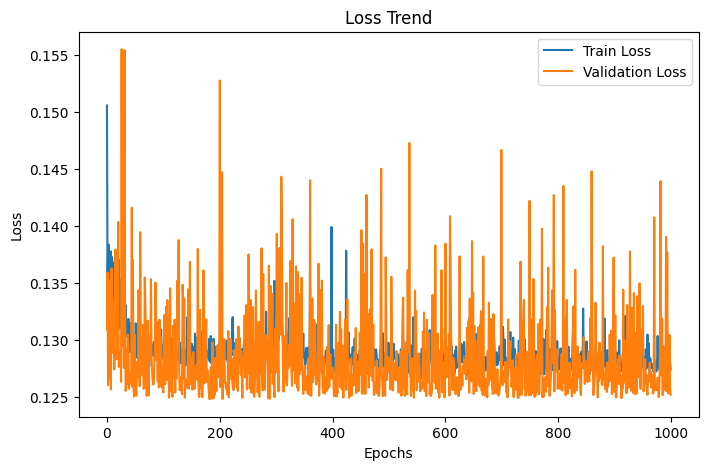

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

received = pd.read_csv("Received_data_set.csv")
transmitted = pd.read_csv("Transmitted_data_set.csv")

received.columns = ["Received_Signal"]
transmitted.columns = ["Transmitted_Signal"]

X = received["Received_Signal"].values.astype('float32').reshape(-1, 1)
Y = (received["Received_Signal"] - transmitted["Transmitted_Signal"]).values.astype('float32').reshape(-1, 1)

indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X, Y = X[indices], Y[indices]

# 데이터 분할 (50% 학습, 20% 검증, 30% 테스트)
sample = X.shape[0]
size_t = int(sample * 0.5)
size_v = int(sample * 0.2)

X_t, Y_t = X[:size_t], Y[:size_t]
X_v, Y_v = X[size_t:size_t + size_v], Y[size_t:size_t + size_v]
X_test, Y_test = X[size_t + size_v:], Y[size_t + size_v:]

device = torch.device("cpu")

X_t_tensor, Y_t_tensor = torch.FloatTensor(X_t).to(device), torch.FloatTensor(Y_t).to(device)
X_v_tensor, Y_v_tensor = torch.FloatTensor(X_v).to(device), torch.FloatTensor(Y_v).to(device)
X_test_tensor, Y_test_tensor = torch.FloatTensor(X_test).to(device), torch.FloatTensor(Y_test).to(device)

# 배치 학습
batch_size = 32
train_dataset = TensorDataset(X_t_tensor, Y_t_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 32->16->1
class NoisePredictorMLP(nn.Module):
    def __init__(self):
        super(NoisePredictorMLP, self).__init__()
        self.fc1 = nn.Linear(1, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.fc1(x), negative_slope=0.01)
        x = torch.nn.functional.leaky_relu(self.fc2(x), negative_slope=0.01)
        x = self.fc3(x)
        return x


model = NoisePredictorMLP().to(device)

loss_function = nn.SmoothL1Loss()  # Huber Loss 를 챗지피티가 추천해주다.


optimizer = optim.Adam(model.parameters(), lr=0.05)

# 학습
num_epochs = 1000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = loss_function(outputs, batch_Y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_train_loss = epoch_loss / len(train_loader)
    val_loss = loss_function(model(X_v_tensor), Y_v_tensor).item()

    train_losses.append(avg_train_loss)
    val_losses.append(val_loss)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}")

# 검증
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).cpu().numpy()

# 실제정답, 예측답 저장
test_results = pd.DataFrame({
    "Actual Noise": Y_test.flatten(),
    "Predicted Noise": predictions.flatten()
})

# 20개만 출력
test_result = test_results.head(20)
print("\n✅ 테스트 데이터 예측 결과 (상위 20개 샘플 출력)")
print(test_results)

# ✅ 20개 데이터에 대한 평균 오차 (Mean Absolute Error, MAE) 계산
mae = np.mean(np.abs(test_results["Actual Noise"] - test_results["Predicted Noise"]))
print(f"\n✅ 상위 20개 데이터의 평균 오차 (MAE): {mae:.4f}")

# ✅ Loss 그래프 출력
plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.legend()
plt.show()





Epoch [10/100], Train Loss: 0.0527, Val Loss: 0.0518
Epoch [20/100], Train Loss: 0.0522, Val Loss: 0.0518
Epoch [30/100], Train Loss: 0.0521, Val Loss: 0.0517
Epoch [40/100], Train Loss: 0.0521, Val Loss: 0.0526
Epoch [50/100], Train Loss: 0.0519, Val Loss: 0.0516
Epoch [60/100], Train Loss: 0.0519, Val Loss: 0.0524
Epoch [70/100], Train Loss: 0.0519, Val Loss: 0.0523
Epoch [80/100], Train Loss: 0.0518, Val Loss: 0.0521
Epoch [90/100], Train Loss: 0.0521, Val Loss: 0.0518
Epoch [100/100], Train Loss: 0.0519, Val Loss: 0.0517

✅ 테스트 데이터 예측 결과 (상위 20개 샘플 출력)
    Actual Noise  Predicted Noise
0      -1.530301        -1.213040
1      -0.968916        -0.634601
2      -0.916264        -0.586986
3       1.065397         1.412728
4       0.137058         0.498528
5       0.776256         0.496015
6       2.132118         1.805868
7      -1.659476        -1.344502
8      -0.033380        -0.294968
9       2.071126         1.752280
10      0.532358         0.221400
11     -0.340119        -0.64

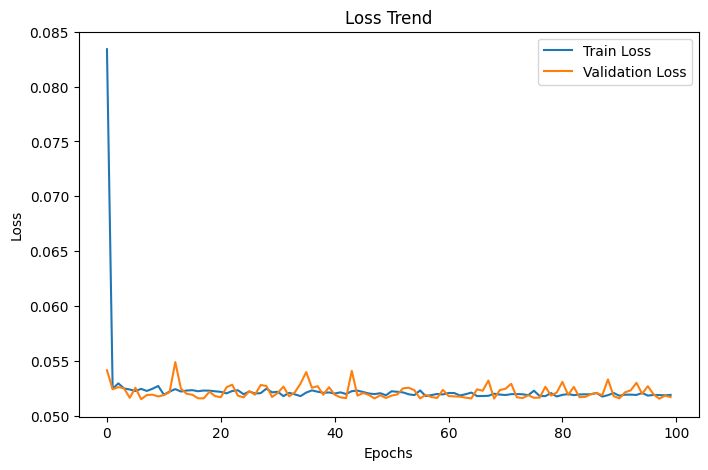

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

# ✅ 데이터 로드
received = pd.read_csv("Received_data_set.csv")
transmitted = pd.read_csv("Transmitted_data_set.csv")

# ✅ 컬럼명 설정
received.columns = ["Received_Signal"]
transmitted.columns = ["Transmitted_Signal"]

# ✅ 데이터 정규화 (Min-Max → 표준화 변경)
X = received["Received_Signal"].values.astype('float32').reshape(-1, 1)
Y = (received["Received_Signal"] - transmitted["Transmitted_Signal"]).values.astype('float32').reshape(-1, 1)

X = (X - X.mean()) / X.std()  # 표준화 적용
Y = (Y - Y.mean()) / Y.std()

# 데이터 랜덤 섞기
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X, Y = X[indices], Y[indices]

# ✅ 데이터 분할 (50% 학습, 20% 검증, 30% 테스트)
sample = X.shape[0]
size_t = int(sample * 0.5)
size_v = int(sample * 0.2)

X_t, Y_t = X[:size_t], Y[:size_t]
X_v, Y_v = X[size_t:size_t + size_v], Y[size_t:size_t + size_v]
X_test, Y_test = X[size_t + size_v:], Y[size_t + size_v:]

# ✅ PyTorch CPU 설정
device = torch.device("cpu")

# ✅ PyTorch 텐서 변환
X_t_tensor, Y_t_tensor = torch.FloatTensor(X_t).to(device), torch.FloatTensor(Y_t).to(device)
X_v_tensor, Y_v_tensor = torch.FloatTensor(X_v).to(device), torch.FloatTensor(Y_v).to(device)
X_test_tensor, Y_test_tensor = torch.FloatTensor(X_test).to(device), torch.FloatTensor(Y_test).to(device)

# ✅ 모델 구조
class NoisePredictorMLP(nn.Module):
    def __init__(self):
        super(NoisePredictorMLP, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.fc1(x), negative_slope=0.01)
        x = torch.nn.functional.leaky_relu(self.fc2(x), negative_slope=0.01)
        x = torch.nn.functional.leaky_relu(self.fc3(x), negative_slope=0.01)
        x = self.fc4(x)
        return x

# ✅ 모델 초기화
model = NoisePredictorMLP().to(device)

# ✅ 손실 함수 변경 (L1Loss → Huber Loss)
loss_function = nn.SmoothL1Loss()  # Huber Loss 사용

# ✅ 옵티마이저 변경 (RMSprop → Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ✅ 학습 과정
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = loss_function(outputs, batch_Y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_train_loss = epoch_loss / len(train_loader)
    val_loss = loss_function(model(X_v_tensor), Y_v_tensor).item()

    train_losses.append(avg_train_loss)
    val_losses.append(val_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}")

# ✅ 테스트 데이터 예측
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).cpu().numpy()

# ✅ 실제 정답값 & 예측값 비교
test_results = pd.DataFrame({
    "Actual Noise": Y_test.flatten(),
    "Predicted Noise": predictions.flatten()
})

# ✅ 상위 20개만 출력
test_results_20 = test_results.head(20)
print("\n✅ 테스트 데이터 예측 결과 (상위 20개 샘플 출력)")
print(test_results_20)

# ✅ 20개 데이터에 대한 평균 오차 (Mean Absolute Error, MAE) 계산
mae_20 = np.mean(np.abs(test_results_20["Actual Noise"] - test_results_20["Predicted Noise"]))
print(f"\n✅ 상위 20개 데이터의 평균 오차 (MAE): {mae_20:.4f}")

# ✅ Loss 그래프 출력
plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.legend()
plt.show()




Epoch [0/100], Train Loss: 0.3815, Val Loss: 0.2545
Epoch [10/100], Train Loss: 0.2557, Val Loss: 0.2595
Epoch [20/100], Train Loss: 0.2544, Val Loss: 0.2521
Epoch [30/100], Train Loss: 0.2537, Val Loss: 0.2532
Epoch [40/100], Train Loss: 0.2544, Val Loss: 0.2523
Epoch [50/100], Train Loss: 0.2528, Val Loss: 0.2534
Epoch [60/100], Train Loss: 0.2524, Val Loss: 0.2515
Epoch [70/100], Train Loss: 0.2531, Val Loss: 0.2565
Epoch [80/100], Train Loss: 0.2517, Val Loss: 0.2526
Epoch [90/100], Train Loss: 0.2522, Val Loss: 0.2582

20개 샘플
    Actual Noise  Predicted Noise
0      -1.198660        -0.672723
1       0.088624        -0.406842
2      -0.727190        -0.229257
3      -1.609000        -2.099042
4       0.152770        -0.338279
5       0.055854        -0.439568
6      -0.837060        -0.327377
7      -0.273540        -0.737704
8      -0.328640         0.216280
9       1.991600         1.636667
10      0.700000         1.315316
11     -0.632600        -1.113947
12     -2.522900     

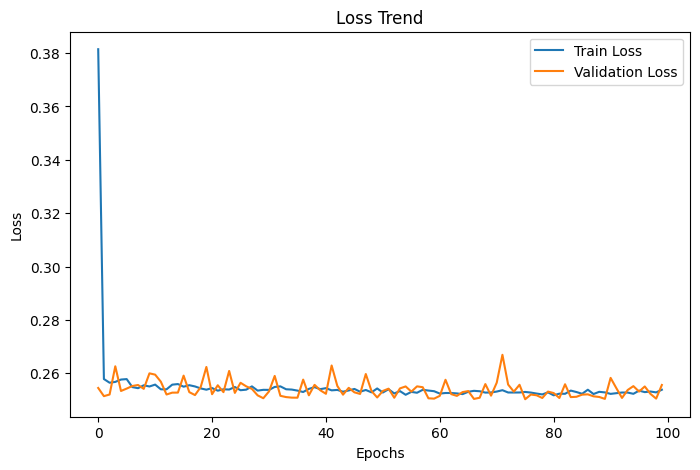

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

received = pd.read_csv("Received_data_set.csv")
transmitted = pd.read_csv("Transmitted_data_set.csv")

received.columns = ["Received_Signal"]
transmitted.columns = ["Transmitted_Signal"]

mean_X, std_X = received["Received_Signal"].mean(), received["Received_Signal"].std()
X = (received["Received_Signal"] - mean_X) / std_X
X = X.values.reshape(-1, 1)
Y = (received["Received_Signal"] - transmitted["Transmitted_Signal"]).values.reshape(-1, 1)

indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X, Y = X[indices], Y[indices]

sample = X.shape[0]
size_t = int(sample * 0.5)
size_v = int(sample * 0.2)

X_t, Y_t = X[:size_t], Y[:size_t]
X_v, Y_v = X[size_t:size_t + size_v], Y[size_t:size_t + size_v]
X_test, Y_test = X[size_t + size_v:], Y[size_t + size_v:]

device = torch.device("cpu")

X_t_tensor, Y_t_tensor = torch.FloatTensor(X_t).to(device), torch.FloatTensor(Y_t).to(device)
X_v_tensor, Y_v_tensor = torch.FloatTensor(X_v).to(device), torch.FloatTensor(Y_v).to(device)
X_test_tensor, Y_test_tensor = torch.FloatTensor(X_test).to(device), torch.FloatTensor(Y_test).to(device)

class NoisePredictorMLP(nn.Module):
    def __init__(self):
        super(NoisePredictorMLP, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = NoisePredictorMLP().to(device)

loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 100
train_losses = []
val_losses = []

train_dataset = TensorDataset(X_t_tensor, Y_t_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    for batch_X, batch_Y in train_loader:
        batch_X = batch_X.to(device)
        batch_Y = batch_Y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = loss_function(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_train_loss = epoch_loss / len(train_loader)
    val_loss = loss_function(model(X_v_tensor), Y_v_tensor).item()

    train_losses.append(avg_train_loss)
    val_losses.append(val_loss)

    if epoch % 10 == 0 or epoch == num_epochs:
        print(f"Epoch [{epoch}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}")

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).cpu().numpy()

test_results = pd.DataFrame({
    "Actual Noise": Y_test.flatten(),
    "Predicted Noise": predictions.flatten()
})

test_results_20 = test_results.head(20)
print("\n20개 샘플")
print(test_results_20)

mae_20 = np.mean(np.abs(test_results_20["Actual Noise"] - test_results_20["Predicted Noise"])) # 원래 값 - 예쌍 노이즈
print(f"\n평균 오차 (MAE): {mae_20:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.legend()
plt.show()



Epoch [0/100], Train Loss: 0.1271, Val Loss: 0.0471
Epoch [10/100], Train Loss: 0.0258, Val Loss: 0.0264
Epoch [20/100], Train Loss: 0.0251, Val Loss: 0.0261
Epoch [30/100], Train Loss: 0.0252, Val Loss: 0.0261
Epoch [40/100], Train Loss: 0.0251, Val Loss: 0.0263
Epoch [50/100], Train Loss: 0.0251, Val Loss: 0.0261
Epoch [60/100], Train Loss: 0.0249, Val Loss: 0.0262
Epoch [70/100], Train Loss: 0.0250, Val Loss: 0.0265
Epoch [80/100], Train Loss: 0.0250, Val Loss: 0.0261
Epoch [90/100], Train Loss: 0.0250, Val Loss: 0.0262

20개 샘플
    Actual Noise  Predicted Noise
0      -0.288680        -0.343667
1      -1.806000        -1.805401
2      -1.914600        -1.913348
3      -1.970400        -1.969398
4      -1.394600        -1.393303
5      -1.088300        -1.086229
6      -1.807900        -1.807295
7      -1.133100        -1.130680
8      -0.964820        -0.964007
9      -0.528700        -0.487327
10     -0.014070         0.020942
11     -1.058400        -1.056563
12     -0.305820     

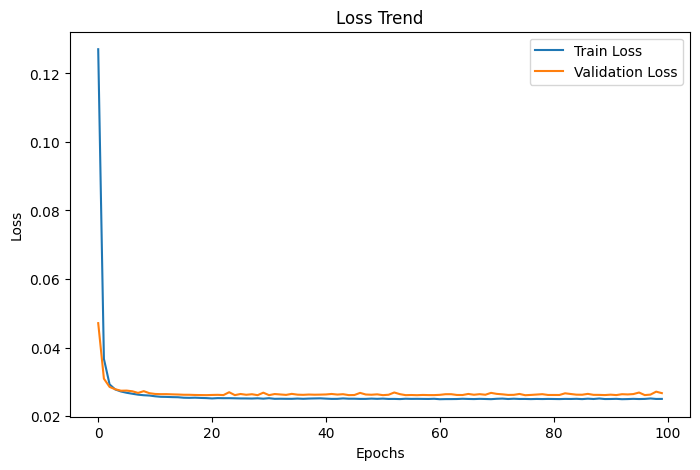

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

received = pd.read_csv("Received_data_set_low_error.csv")
transmitted = pd.read_csv("Transmitted_data_set_low_error.csv")

received.columns = ["Received_Signal"]
transmitted.columns = ["Transmitted_Signal"]

mean_X, std_X = received["Received_Signal"].mean(), received["Received_Signal"].std()
X = (received["Received_Signal"] - mean_X) / std_X # x -> 받은 신호, std는 지피티가 추천해줘서 넣음.
X = X.values.reshape(-1, 1)
Y = (received["Received_Signal"] - transmitted["Transmitted_Signal"]).values.reshape(-1, 1) # y -> 받은 신호와 보낸 신호의 차이, 즉 노이즈를 y로 설정

indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X, Y = X[indices], Y[indices] # 오버피팅 방지를 위한 랜덤화, 셔플

sample = X.shape[0]
size_t = int(sample * 0.5)
size_v = int(sample * 0.2) # 샘플의 절반은 트레이닝, 20퍼센트는 validation으로 사용

X_t, Y_t = X[:size_t], Y[:size_t]
X_v, Y_v = X[size_t:size_t + size_v], Y[size_t:size_t + size_v]
X_test, Y_test = X[size_t + size_v:], Y[size_t + size_v:] # 인덱싱 / 남은 30퍼는 테스트용

device = torch.device("cpu")

X_t_tensor, Y_t_tensor = torch.FloatTensor(X_t).to(device), torch.FloatTensor(Y_t).to(device)
X_v_tensor, Y_v_tensor = torch.FloatTensor(X_v).to(device), torch.FloatTensor(Y_v).to(device)
X_test_tensor, Y_test_tensor = torch.FloatTensor(X_test).to(device), torch.FloatTensor(Y_test).to(device) # 텐서로 변환

class NoisePredictorMLP(nn.Module): # 노이즈 자체의 패턴을 학습하기 위하여 MLP 사용 64->32->16->1
    def __init__(self):
        super(NoisePredictorMLP, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)

    def forward(self, x): # forward에는 relu사용
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = NoisePredictorMLP().to(device)

loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) # lr은 10^-3 -> 가장 일반적인 lr

num_epochs = 100
train_losses = []
val_losses = []

train_dataset = TensorDataset(X_t_tensor, Y_t_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

for epoch in range(num_epochs):
    model.train() # 학습모드
    epoch_loss = 0.0

    for batch_X, batch_Y in train_loader:
        batch_X = batch_X.to(device)
        batch_Y = batch_Y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = loss_function(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_train_loss = epoch_loss / len(train_loader)
    val_loss = loss_function(model(X_v_tensor), Y_v_tensor).item()

    train_losses.append(avg_train_loss)
    val_losses.append(val_loss)

    if epoch % 10 == 0 or epoch == num_epochs:
        print(f"Epoch [{epoch}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}")

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).cpu().numpy()

test_results = pd.DataFrame({
    "Actual Noise": Y_test.flatten(),
    "Predicted Noise": predictions.flatten()
})

test_results_20 = test_results.head(20)
print("\n20개 샘플")
print(test_results_20)

mae_20 = np.mean(np.abs(test_results_20["Actual Noise"] - test_results_20["Predicted Noise"]))
print(f"\n평균 오차(MAE): {mae_20:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.legend()
plt.show()
